# COVID-19 Stock Market Analysis

The goal of the following data analysis is to understand the changes in the stock market of the S&P 500 pre and post Covid-19. The primary objective of the following exploration is to answer the guiding question:

"How were companies within the S&P 500 impacted by the COVID-19 Stock Market Crash?" Here we are going to assume the position of an investor and conduct a thourough analysis.

Learning Outcomes:
1. Use statistical and financial concepts to drive a stronger, more quantitative approach to analysis.
2. Gain experience with data manipulation and data visualization using Python 3 libraries.
3. Become comfortable with stock market analysis.

In [2]:
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

To best analyse the S&P 500, I'm going to be using the stock data of three random companies that I chose: Tesla, Ford, and Disney. In my opinion, these three companies are a good visualization pf the varying industries within the S&P - all possibly impacted differently from COVID-19. We cannot make any conclusions about the S&P 500 with sparse stock data sets that have no real diversity.

In [3]:
start = datetime.datetime(2019, 4, 19)
end = datetime.datetime(2020, 12, 20)

In [4]:
tesla  = web.DataReader("TSLA",'yahoo',start,end)
ford   = web.DataReader("F",'yahoo',start,end)
disney = web.DataReader("DIS",'yahoo',start,end)

In [5]:
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
disney.to_csv('Disney_Stock.csv')

# Opening Prices

As a frame of reference, let us first overlay some basic market data to observe the general trend of the stocks prices  for Tesla, Ford, and Disney.

Text(0.5, 1.0, 'Stock Prices of Tesla, Ford, and Disney')

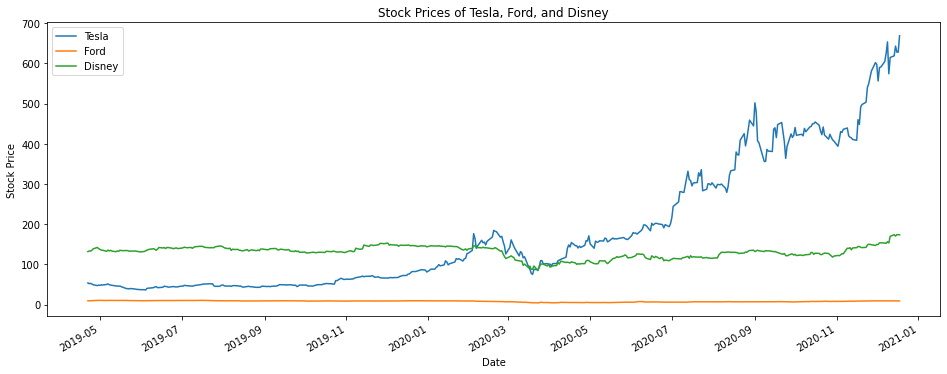

In [6]:
tesla['Open'].plot(label = 'Tesla', figsize = (16,6))
ford['Open'].plot(label = 'Ford')
disney['Open'].plot(label = 'Disney')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Stock Prices of Tesla, Ford, and Disney')

Just from this, we can quickly see that around 2020-01 and 2020-03 there was a generally large dip in the opening stock prices for Tesla and Disney. This makes sense as the COVID-19 stock market crash occured between these two date times. 

Note that you cannot notice this dip for Ford. A possible reason for this could be because of how low its stock price fairs in comparison to the others. Let us quickly confirm this.

Text(0.5, 1.0, 'Stock Prices of Ford')

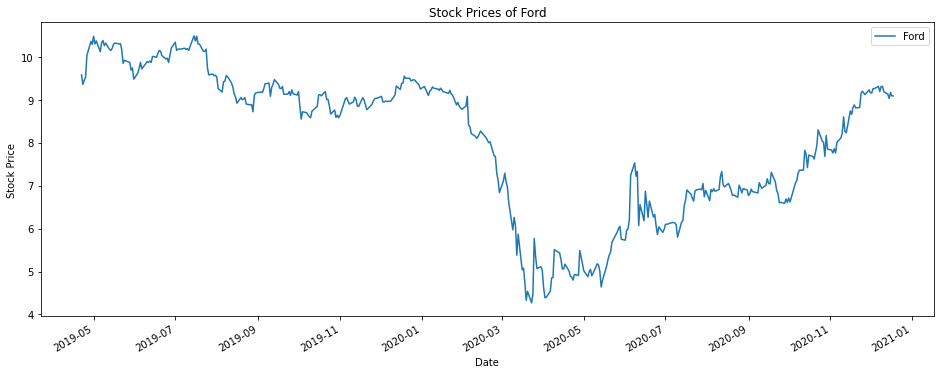

In [7]:
ford['Open'].plot(label = 'Ford', figsize = (16, 6))
plt.legend()
plt.ylabel('Stock Price')
plt.title('Stock Prices of Ford')

We can now confirm the same trend follows for Ford.

# Volume Traded

In [8]:
startVol = datetime.datetime(2020, 1, 19)
endVol = datetime.datetime(2020, 4, 20)

In [9]:
teslaVol  = web.DataReader("TSLA",'yahoo',startVol,endVol)
fordVol   = web.DataReader("F",'yahoo',startVol,endVol)
disneyVol = web.DataReader("DIS",'yahoo',startVol,endVol)

Text(0.5, 1.0, 'Volume Traded of Tesla, Ford, and Disney')

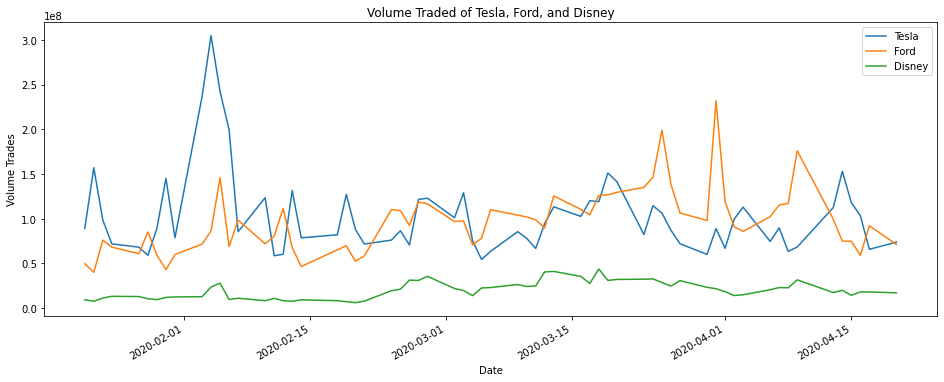

In [10]:
teslaVol['Volume'].plot(label = 'Tesla', figsize = (16, 6))
fordVol['Volume'].plot(label = 'Ford')
disneyVol['Volume'].plot(label = 'Disney')
                  
plt.legend()
plt.ylabel('Volume Trades')
plt.title('Volume Traded of Tesla, Ford, and Disney')

# Moving Average

In the data above, we can only predict a very general data trend. However, a lot of the data is "noisy" in the sense that you can see every
little dip and rise from every single day. Thus the data may not be very reliable considering a short observations window.

A better indicator of a trend in stock fluctuation is the moving average which is a "smoothing method" of sorts in the time series that deals with removing outliers and making data more reliable. 

Text(0.5, 1.0, 'Moving Averages of Tesla, Ford, and Disney')

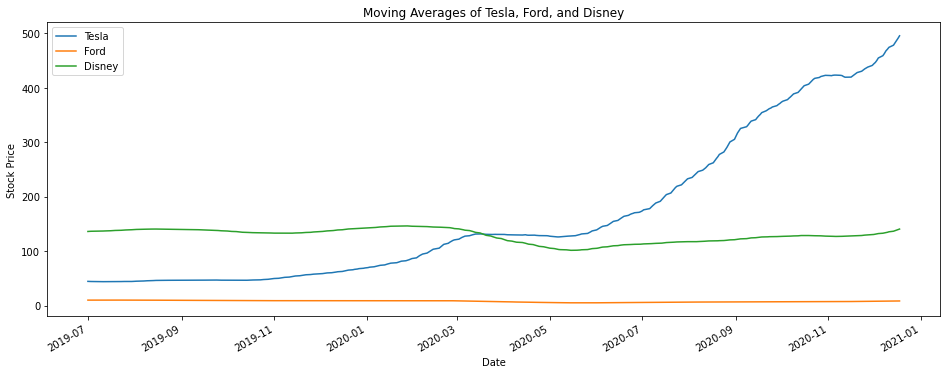

In [11]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA50'].plot(label = 'Tesla', figsize = (16,6))

ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA50'].plot(label = 'Ford')

disney['MA50'] = disney['Open'].rolling(50).mean()
disney['MA50'].plot(label = 'Disney')

plt.legend()
plt.ylabel('Stock Price')
plt.title('Moving Averages of Tesla, Ford, and Disney')

Further Considerations:
*This data does not effectively tell us much about how each company was specifically impacted, but is rather just an indicator of company open prices. Thus it does not give us a thourough enough statistical or quantitative analysis, and fails to satisfy the first learning objective. Let us continue to explore the data further.

# Daily Percentage Change

One of the best ways to determine the nature of a stock is to analyze its volatility. The volatility of a stock determines how stable it is and paints a picture to investors on whether its current trends are likely to continue or not. It is a strong indicator of a company's overall strength because unlike the previous averages it doesn't rely on a general pattern or trend but rather a quantitative analysis of the daily percentage change. Previously we could only see generally how much the stock fluctuated but that wasn't enough evidence to simply make any strong claim. Hence the daily percentage change allows us to accomplish that. 

First let's set a 10 month interval pre and post covid.

Pre COVID-19 (April 19th, 2019 - Febrary 19th, 2020)

In [24]:
startPre = datetime.datetime(2019, 4, 19)
endPre = datetime.datetime(2020, 2, 19)

In [25]:
teslaPre  = web.DataReader("TSLA",'yahoo',startPre,endPre)
fordPre   = web.DataReader("F",'yahoo',startPre,endPre)
disneyPre = web.DataReader("DIS",'yahoo',startPre,endPre)

Post COVID-19 (February 20th, 2020 - December 20th, 2020)

In [26]:
startPost = datetime.datetime(2020, 2, 20)
endPost = datetime.datetime(2020, 12, 20)

In [27]:
teslaPost  = web.DataReader("TSLA",'yahoo',startPost,endPost)
fordPost   = web.DataReader("F",'yahoo',startPost,endPost)
disneyPost = web.DataReader("DIS",'yahoo',startPost,endPost)

*create a returns column to calculate daily percentage change.

In [28]:
teslaPre['returnsPre']=(teslaPre['Close']/teslaPre['Close'].shift(1)) - 1
fordPre['returnsPre']=(fordPre['Close']/fordPre['Close'].shift(1)) - 1
disneyPre['returnsPre']=(disneyPre['Close']/disneyPre['Close'].shift(1)) - 1

In [29]:
teslaPost['returnsPost']=(teslaPost['Close']/teslaPost['Close'].shift(1)) - 1
fordPost['returnsPost']=(fordPost['Close']/fordPost['Close'].shift(1)) - 1
disneyPost['returnsPost']=(disneyPost['Close']/disneyPost['Close'].shift(1)) - 1

# Volatility for Tesla, Ford, and Disney

Text(0.5, 1.0, 'Tesla')

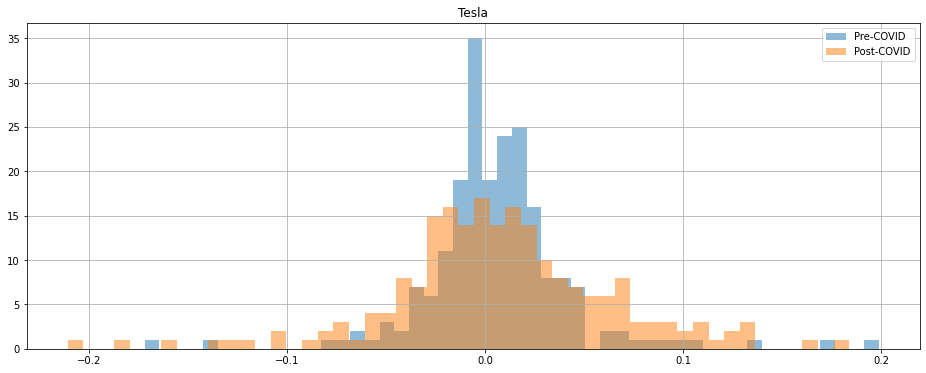

In [310]:
teslaPre['returnsPre'].hist(bins=50,label='Pre-COVID',alpha=0.5, figsize = (16,6))
teslaPost['returnsPost'].hist(bins=50,label='Post-COVID',alpha=0.5)
plt.legend()
plt.title('Tesla')

Text(0.5, 1.0, 'Ford')

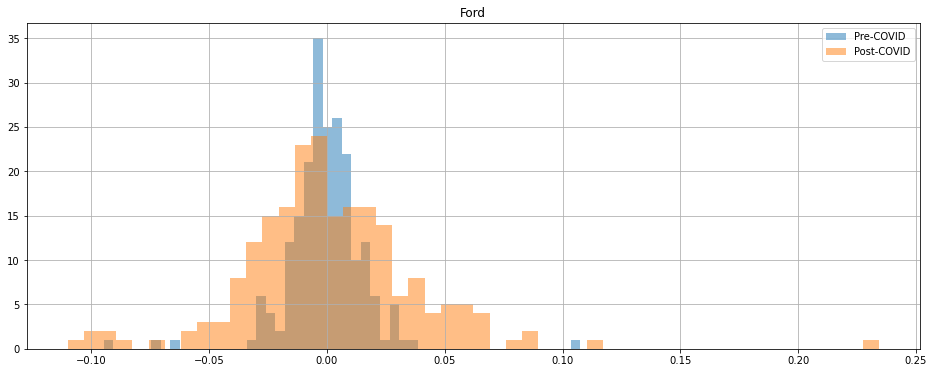

In [311]:
fordPre['returnsPre'].hist(bins=50,label='Pre-COVID',alpha=0.5, figsize = (16,6))
fordPost['returnsPost'].hist(bins=50,label='Post-COVID',alpha=0.5)
plt.legend()
plt.title('Ford')

Text(0.5, 1.0, 'Disney')

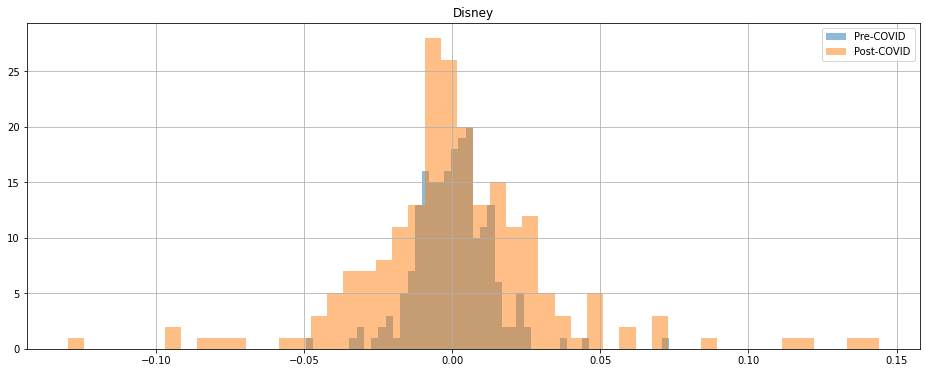

In [312]:
disneyPre['returnsPre'].hist(bins=50,label='Pre-COVID',alpha=0.5, figsize = (16,6))
disneyPost['returnsPost'].hist(bins=50,label='Post-COVID',alpha=0.5)
plt.legend()
plt.title('Disney')

Volatility is a measure of standard deviation. The greater the standard deviation and thus the wider the bins in the histogram, the more volatile or "unstable" the stock actually is. Overall, we can see that with every single stock analyzed here (Tesla, Ford, and Disney), each one is considered to have a greater volatility after the COVID-19 crash than before it. 

We can conclude from this that COVID-19 impacted each stock by reducing its stability.

# Summary of Findings and Conclusion

From our findings, we can conclude that the COVID-19 crash led to a fall in stock prices, but also an increase in stock volatility. We were able to determine this by analyzing the Daily Percentage Change at a 10 month interval before and after the stock market crashed. What we determined was that for any stock after the crash, there was a significantly larger standard deviation in the prices. Hence we concluded that stability was weakened post COVID-19. 